# Importing MNIST dataset and getting insights


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[0].shape

()

In [ ]:
x_test.shape


(10000, 28, 28)

We have 60000 training examples, 10000 test examples and each data point is a 28 * 28 vector of a handwritten digit.

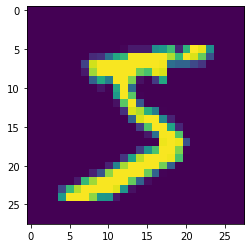

this handwritten digit is 5


In [ ]:
%matplotlib inline 
from matplotlib import pyplot as plt
data = x_train[0]
plt.imshow(data, interpolation='nearest')
plt.show()
print("this handwritten digit is", y_train[0])

# Training a fully connected deep neural network

We first need to flatten the images (2d matrixes) to use a basic fully connected network.

In [ ]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Since the classes of the data points are categorical and not ordinal we need to convert them to ordinal values. (class 3 !> 1) 

In [ ]:
import tensorflow as tf
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test =  tf.keras.utils.to_categorical(y_test, num_classes)

## Neural Network Architecture

Since the input vectors are 28X28 we have 28X28 nodes in input layer.

Since we have one hot encoded vectors as output and they are of dimension 10*1 we have 10 output nodes.

We use SGD as optimizer.

Since we are facing a classification task and data points belong to each class with a probability p we use categorical cross entropy.

We use softmax activation function for the last layer since all the output values are between 0 and 1 and the sum of all ten values is equal to 1.


Each data point is associated with the class that has the most probability in the one hot encoded vector.


In [ ]:
from keras.layers import Dense # fully connected layers
from keras.models import Sequential

image_size = 784 # 28*28
num_classes = 10 # ten unique digits


We build and train severral NN with different depths.

All the hidden layers have 32 nodes.

All the hidden layers have softmax as their activation.

Training set is split into training set and validation set. 

Training set size = 0.9 X 60000

Test set size = 0.1 X 60000

default batch size is 128; meaning that 128 samples from the training set are used everytime for forward and backward propogation.

In [ ]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=20):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


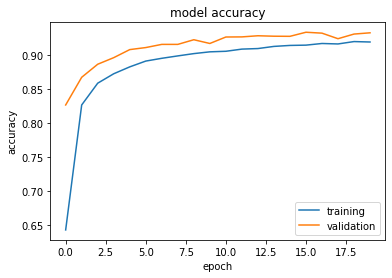


Test loss: 0.29
Test accuracy: 0.92
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


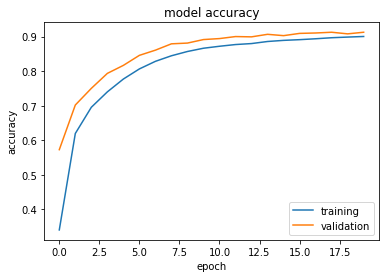


Test loss: 0.415
Test accuracy: 0.9
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


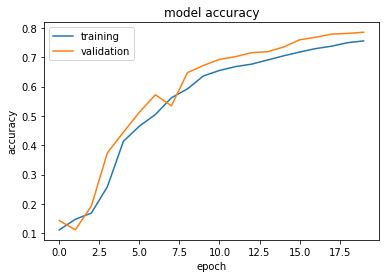


Test loss: 1.06
Test accuracy: 0.763


In [ ]:
for layers in range(1, 4):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


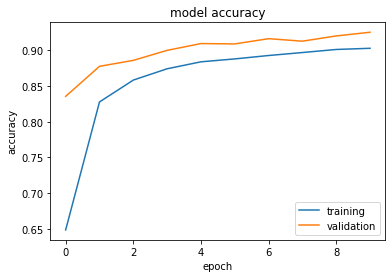


Test loss: 0.37
Test accuracy: 0.909
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


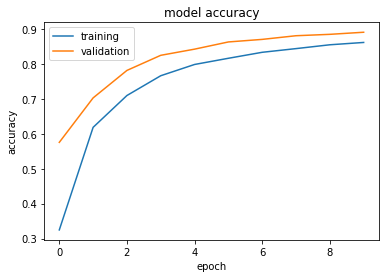


Test loss: 0.683
Test accuracy: 0.864
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                25120     
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


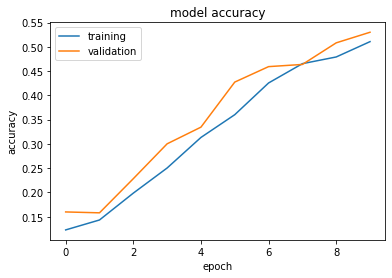


Test loss: 1.88
Test accuracy: 0.511


In [ ]:
for layers in range(1, 4):
    model = create_dense([32] * layers)
    evaluate(model, epochs = 10)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                25120     
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


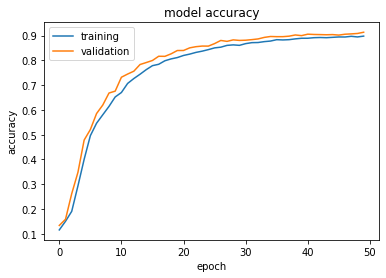


Test loss: 0.396
Test accuracy: 0.898


In [ ]:
model = create_dense([32] * 3)
evaluate(model, epochs = 50)

# Training a CNN

In [ ]:
from keras.datasets import mnist
import numpy as np
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
# reshaping
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape
#normalising
xtrain=xtrain/255
xtest=xtest/255
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)
#importing the model
from keras.models import Sequential
#creating model object
model=Sequential()

In [ ]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

معمولا معماری‌های این مدل شبکه عصبی ها اول یک سری لایه ی 

convolution 

دارند 

بعد آن یک سری 

pooling 

و در آخر

fully connected layers.

همین کار را که در

practice 

قبلا جواب گرفته است را انجام میدهیم.


In [ ]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))



In [ ]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Epoch 1/5
600/600 [==============================] - 13s 7ms/step - loss: 0.1318 - accuracy: 0.9590 - val_loss: 0.0454 - val_accuracy: 0.9840
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0301 - val_accuracy: 0.9911
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0235 - val_accuracy: 0.9909
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0364 - val_accuracy: 0.9887


In [ ]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9887


([0.02224162593483925, 0.9929166436195374],
 [0.03642405942082405, 0.9886999726295471])

# Sources

https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI2NTBhMmNlNDdiMWFiM2JhNDA5OTc5N2Y4YzA2ZWJjM2RlOTI4YWMiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTYxNDczNTQsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNDc2NDAxMDcxMjgwODQ3MzMzOCIsImVtYWlsIjoibmsuc2hhaGFiaTc5QGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiTmlrYSBTaGFoYWJpIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FBVFhBSnhaeEtwV1lFaWhLOGk1amM0dkJVWHh1SUV3TUE4dEFmMkkyektQPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6Ik5pa2EiLCJmYW1pbHlfbmFtZSI6IlNoYWhhYmkiLCJpYXQiOjE2NTYxNDc2NTQsImV4cCI6MTY1NjE1MTI1NCwianRpIjoiMDU3YjFmZDZmNjY0Yzg2Mzg2ZDgyODE5NjMwNzU4NTM3NDA5MDRiZCJ9.K8eoMx8lc7QHz62s6GVy_x-Xaif2BnamMwrlX_wWuQTEJCPdk6CZ1OtFPwO9LnE8DDAbCGKoh9qMN7X8SZeohwc27w-tG8vMj5uSGXh4SGAZla_xTTRrNK8ayW_BDF3VxaA7vKStlF44fA_G2fY6sEQ-P_DGhTvBVRliO1oYY5hsiFT2OxCxgnj4o6o6-fzOMrOQDWLgfwvPKRqnipRIgsSc3roIzpEMCtlFPyXvUdMf0YuSd9CvDgevJmBdVTkMuHADwPLoNrP8TUzmtdCiM_u9ZRnGUwUoNG5BsZLqj17SUBqHMdxVN1_bbTJPoOHkgnnH2C08VDL7MLzjzYQ6AQ



https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/